In [51]:
%pip install gensim
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [53]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['midterm']

# Getting the most similar words

print(model.most_similar('midterm'))

# Getting the similarity between two words

print(model.similarity('midterm', 'final'))


[('primaries', 0.6689149737358093), ('midterms', 0.6513818502426147), ('caucuses', 0.6410295963287354), ('mid-term', 0.6386772990226746), ('gubernatorial', 0.6312282085418701), ('election', 0.6280590295791626), ('redistricting', 0.618216335773468), ('governorship', 0.6150888800621033), ('elections', 0.6087819337844849), ('congressional', 0.6037730574607849)]
0.31073207


Part 1a

In [54]:

#find the most similar words to a word of your choice.
print(model.most_similar('midterm')) 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

[('primaries', 0.6689149737358093), ('midterms', 0.6513818502426147), ('caucuses', 0.6410295963287354), ('mid-term', 0.6386772990226746), ('gubernatorial', 0.6312282085418701), ('election', 0.6280590295791626), ('redistricting', 0.618216335773468), ('governorship', 0.6150888800621033), ('elections', 0.6087819337844849), ('congressional', 0.6037730574607849)]


When I write midterm I think of midterm exams, but the most relevant word here is primaries, which is still the plural form of this I can understand, but I don't quite understand the similarity between the two words.

In [55]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827142715454102), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665560603141785), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.6407975554466248), ('le', 0.6403627395629883), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.4533277451992035), ('non-arabs', 0.45208775997161865), ('amerindians', 0.4478239417076111), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921766877174377), ('cats', 0.8814381957054138), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835323572158813), ('pet', 0.6792975664138794), ('horses', 0.6774963736534119), ('pigs', 0.6755765676498413), ('animal', 0.6683687567710876)]


In [56]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102038621902466), ('miscarry', 0.5550355911254883), ('lactating', 0.5421728491783142), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215138852596283), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.4072844088077545), ('technicals', 0.40608730912208557), ('allardyce', 0.4018688499927521), ('boss', 0.4010736346244812), ('rangers', 0.39962294697761536), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208152770996),
 ('nurse', 0.7757078409194946),
 ('physician', 0.7128060460090637),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793615818023682),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [57]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
vector = model['teacher']-model['student']
words = ['classroom','school','homework','vacation']
for v in words:
    print(model.most_similar(model[v] + vector), "\n")
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

[('classroom', 0.8461593985557556), ('teacher', 0.674168586730957), ('kindergarten', 0.6390368938446045), ('teaching', 0.6337457895278931), ('math', 0.6274130344390869), ('classrooms', 0.6253047585487366), ('instruction', 0.6238126158714294), ('kitchen', 0.5985823273658752), ('homework', 0.5963627696037292), ('p.e.', 0.573155403137207)] 

[('school', 0.8791659474372864), ('teacher', 0.8268716335296631), ('elementary', 0.7602850794792175), ('taught', 0.7383472919464111), ('teaching', 0.7355301380157471), ('college', 0.735299289226532), ('schools', 0.6823766231536865), ('instructor', 0.6642352938652039), ('graduate', 0.6550169587135315), ('kindergarten', 0.6533423066139221)] 

[('homework', 0.8710255026817322), ('chores', 0.6583672761917114), ('chore', 0.6211044788360596), ('schoolwork', 0.6145627498626709), ('basics', 0.6130527257919312), ('bedtime', 0.5592958331108093), ('math', 0.5552187561988831), ('housework', 0.5490278601646423), ('lessons', 0.5381448268890381), ('dad', 0.528654217

The data shows potential biases through the clustering of terms, revealing assumptions about education and daily activities. In the first cluster, words like "classroom," "teacher," "kindergarten," and "math" are strongly associated, suggesting a focus on early childhood education and specific subjects. This implies a narrow perspective on teaching, potentially overlooking other learning environments, subjects, or non-traditional educational roles.

Similarly, the clustering of "homework," "chores," and "bedtime" reflects assumptions that link education with routine tasks, suggesting that learning primarily happens through structured activities. The vacation-related cluster emphasizes leisure and travel, which might not reflect diverse socioeconomic experiences. These clusters reveal an implicit bias toward certain cultural norms and educational practices, potentially limiting the broader understanding of these concepts.


Part 2: Visualization and Embeddings in Space

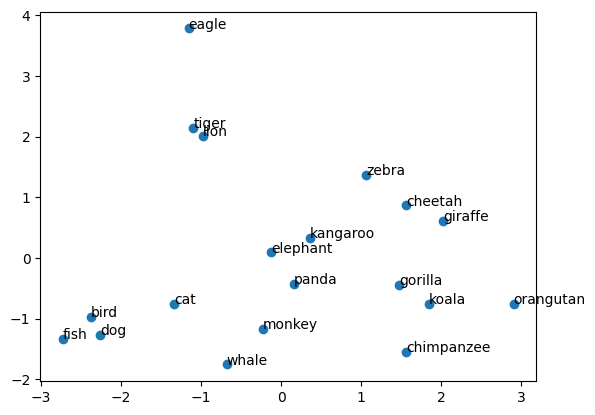

In [58]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


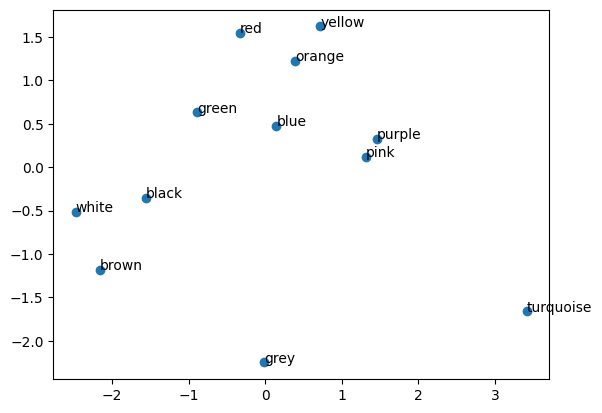

In [59]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=['red','white','green','pink','black','orange','yellow','grey','purple','brown','blue','turquoise']

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()



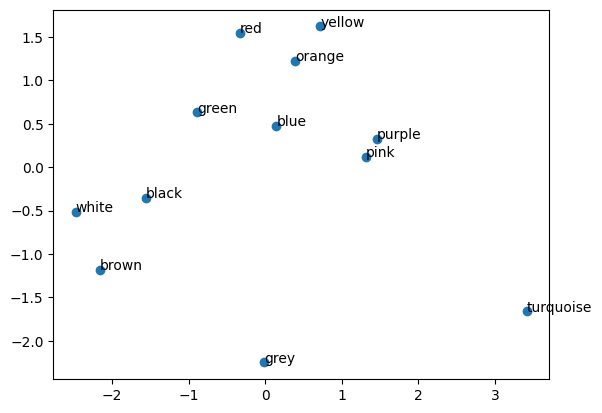

In [60]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=['red','white','green','pink','black','orange','yellow','grey','purple','brown','blue','turquoise']

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


Both times we found that the warmer colours dimension1 would be a bit larger, but in fact the colours should mostly be the same or at least closer.At the same timeAlso some of theAlso some of the moreAlso some of the more westernAlso some of the moreAlso some of the rarerAlso some of the rarerAlso some of the rarer coloursAlso some of the rarer colours dimensionAlso some of the rarer colours dimension should beAlso some of the rarer colours should have a lower dimension.Also some of the rarer colours dimension should be lower.

Part 3: Embedding reddit posts

In [61]:
import pandas as pd
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [62]:
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)

from sklearn.feature_extraction.text import CountVectorizer

#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
df_bow = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

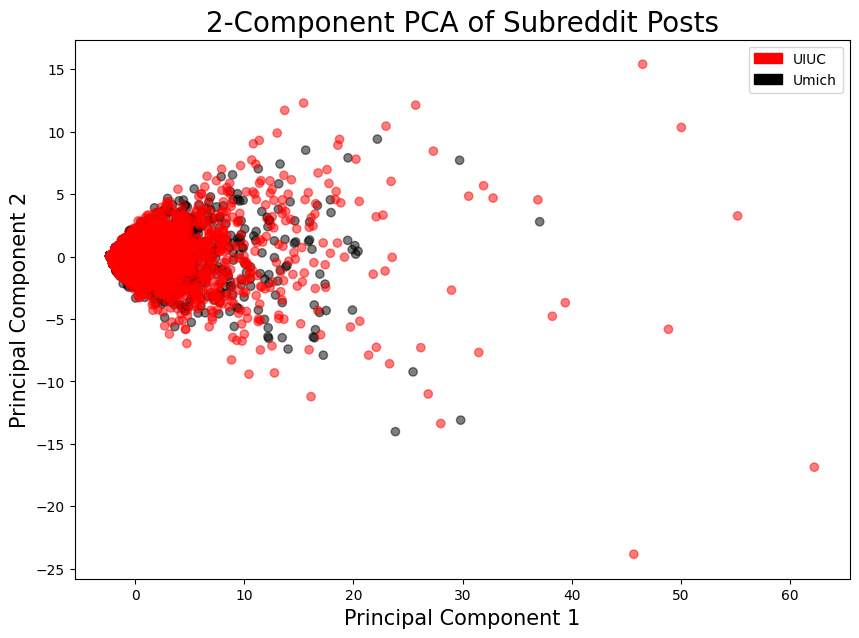

In [63]:
import matplotlib.patches as mpatches

# Perform PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(df_bow)

# Create a DataFrame with the PCA results and the labels
pca_df = pd.DataFrame(data=pc, columns=['principal component 1', 'principal component 2'])
pca_df['label'] = data['label'].values

# Define colors for the labels
colors = ['red', 'black']

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(
    pca_df["principal component 1"],
    pca_df["principal component 2"],
    c=pca_df["label"].apply(lambda x: colors[x]),
    alpha=0.5
)

# Label the axes and add a title
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('2-Component PCA of Subreddit Posts', fontsize=20)

# Add a legend
red_patch = mpatches.Patch(color='red', label='UIUC')
black_patch = mpatches.Patch(color='black', label='Umich')
plt.legend(handles=[red_patch, black_patch])

plt.show()

There is no clear separation between the two columns

In [64]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

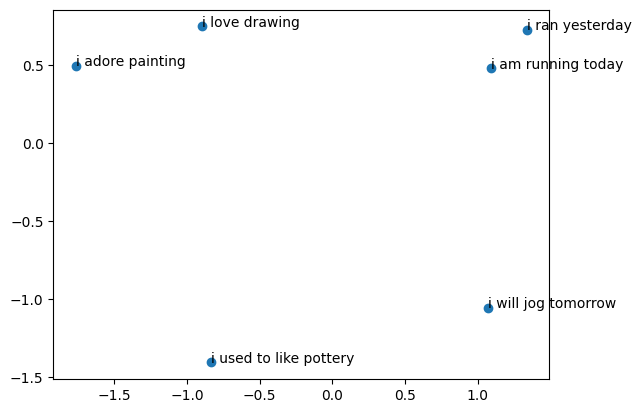

In [65]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [66]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

c:\Users\24366\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\24366\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


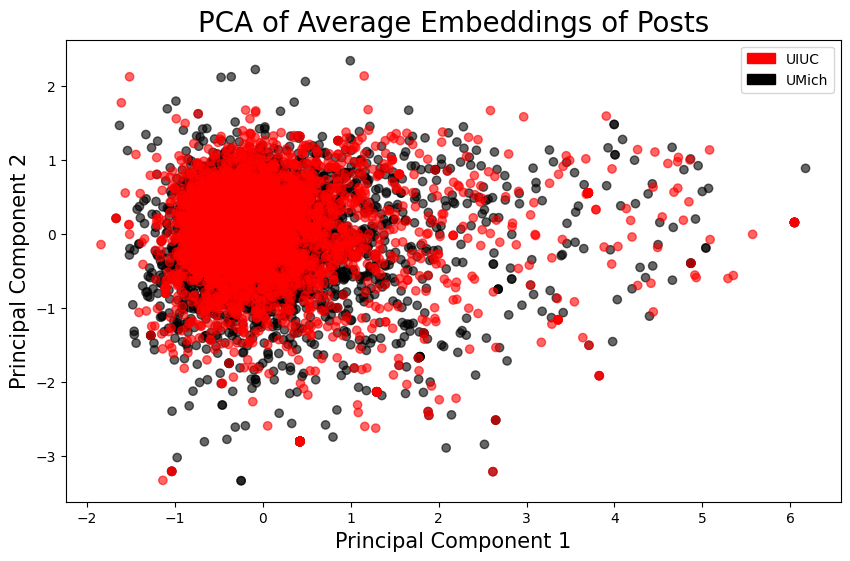

In [67]:
data['avg_embedding'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))

# Filter out any empty embeddings
data = data[data['avg_embedding'].apply(lambda x: x is not None and isinstance(x, np.ndarray) and x.size > 0)]

# Stack embeddings into a matrix for PCA
avg_embeddings_matrix = np.vstack(data['avg_embedding'].values)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings_matrix)

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Label'] = data['label'].values

# Map labels to colors for visualization
colors = {0: 'red', 1: 'black'}  # assuming 0 for mich, 1 for uiuc
pca_df['Color'] = pca_df['Label'].map(colors)

# Plot PCA results, coloring points by label
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Color'], alpha=0.6)

# Add labels and title
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('PCA of Average Embeddings of Posts', fontsize=20)

# Create legend
red_patch = mpatches.Patch(color='red', label='UIUC')
blue_patch = mpatches.Patch(color='black', label='UMich')
plt.legend(handles=[red_patch, blue_patch])

# Show plot
plt.show()

There are more outliers than the last one, but still no clear separation there.

Part 4: HuggingFace and BERT

In [68]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [69]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
data['cleaned_text'] = data['cleaned_text'].astype(str)

# Step 2: Perform sentiment analysis in batches with error handling
batch_size = 50  # Set a batch size
sentiments = []

for i in range(0, len(data), batch_size):
    # Select the batch, ensuring it does not go out of bounds
    batch_texts = data['cleaned_text'].iloc[i:i+batch_size].tolist()
    
    # Handle empty or problematic text entries
    batch_texts = [text if len(text) > 0 else "neutral text" for text in batch_texts]
    
    # Apply sentiment analysis on the batch
    try:
        batch_results = pipe(batch_texts)
        # Extract the labels from each result in the batch
        batch_labels = [result['label'] for result in batch_results]
        # Ensure batch_labels length matches the batch_texts length
        if len(batch_labels) != len(batch_texts):
            batch_labels = ["NEUTRAL" for _ in batch_texts]  # Default if results are mismatched
    except Exception as e:
        print(f"Error processing batch {i}: {e}")
        batch_labels = ["NEUTRAL" for _ in batch_texts]  # Assign default label for failed batch

    # Add the labels to the sentiments list
    sentiments.extend(batch_labels)

# Step 3: Assign the results to the 'sentiment' column
data['sentiment'] = sentiments[:len(data)]  # Ensure no overflow in assignment

# Step 4: Calculate the most common sentiment label
most_common_sentiment = data['sentiment'].mode()[0]

# Step 5: Group by subreddit label to compare sentiment distributions
sentiment_counts_by_subreddit = data.groupby(['label', 'sentiment']).size().unstack(fill_value=0)


print("Most common sentiment:", most_common_sentiment)
print("\nSentiment distribution by subreddit:\n", sentiment_counts_by_subreddit)
print("\nSample posts with sentiment labels:\n", sample_posts)

Error processing batch 0: index out of range in self
Error processing batch 50: index out of range in self
Error processing batch 100: index out of range in self
Error processing batch 200: index out of range in self
Error processing batch 250: index out of range in self
Error processing batch 400: index out of range in self
Error processing batch 500: index out of range in self
Error processing batch 550: index out of range in self
Error processing batch 650: index out of range in self
Error processing batch 700: index out of range in self
Error processing batch 750: index out of range in self
Error processing batch 850: index out of range in self
Error processing batch 900: index out of range in self
Error processing batch 950: index out of range in self
Error processing batch 1000: index out of range in self
Error processing batch 1050: index out of range in self
Error processing batch 1100: index out of range in self
Error processing batch 1150: index out of range in self
Error pro

The most common is NEU.

In [77]:
sample_posts = data[['cleaned_text', 'sentiment']].sample(10)
print(sample_posts)

                                           cleaned_text sentiment
131                            mo in champaign is crazy   NEUTRAL
726                         unfortunately that is true    NEUTRAL
4536                  both of themmore with hot one tho   NEUTRAL
737   notice that many times scammers will reuse pic...   NEUTRAL
4258                im just gonna add myself under this   NEUTRAL
3970                           do you hike in the tatry   NEUTRAL
2626                                            deleted   NEUTRAL
4490                       its only safe if you boof it   NEUTRAL
3643            its really not as simple as that sounds       NEG
4732  dont let the downers get you have been watchin...   NEUTRAL


It looks good to me.

In [80]:
#is the UIUC or Michigan subreddit more negative?
sentiment_counts_by_subreddit = data.groupby(['label', 'sentiment']).size().unstack(fill_value=0)

# Calculate the percentage of negative sentiments in each subreddit
sentiment_counts_by_subreddit['Negative Percentage'] = (
    sentiment_counts_by_subreddit['NEG'] / sentiment_counts_by_subreddit.sum(axis=1) * 100
)

# Display the results
print("\nNegative sentiment percentage by subreddit:\n", sentiment_counts_by_subreddit[['NEG', 'Negative Percentage']])

# Determine which subreddit is more negative
more_negative = sentiment_counts_by_subreddit['Negative Percentage'].idxmax()
subreddit_name = "UIUC" if more_negative == 1 else "Michigan"
print(f"\nThe {subreddit_name} subreddit is more negative based on sentiment analysis.")


Negative sentiment percentage by subreddit:
 sentiment  NEG  Negative Percentage
label                              
0           38             0.814577
1          256             5.532743

The UIUC subreddit is more negative based on sentiment analysis.
